In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer

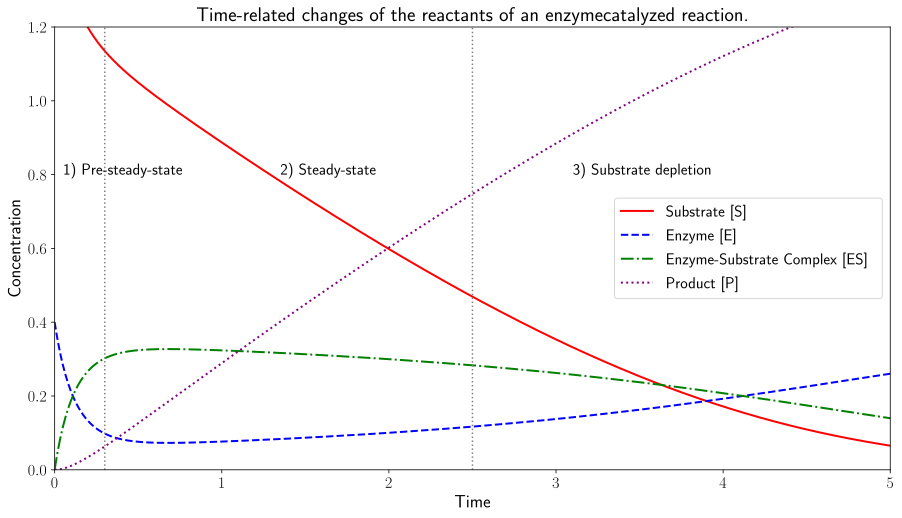

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def CAMP_PDEP(t, x):
    A = x[0]
    E = x[1]
    EA = x[2]
    P = x[3]

    dAdt = -k1*A*E + k_1*EA
    dEdt = -k1*A*E + (k_1 + k2) * EA
    dEAdt = k1*A*E - (k_1 + k2) * EA
    dPdt = k2*EA
    return [dAdt, dEdt, dEAdt, dPdt]

k1 = 5
k_1 = 0.1
k2 = 1

x0 = [1.5, 0.4, 0, 0]
time_points = np.linspace(0, 5, 1000)
solution = solve_ivp(CAMP_PDEP, (time_points[0], time_points[-1]), x0, t_eval=time_points)

t = solution.t
A, E, EA, P = solution.y

pre_steady_state = 0.3
steady_state = 2.5

fig = plt.figure(figsize=(15, 8))
plt.title("Time-related changes of the reactants of an enzymecatalyzed reaction.", fontsize=20)
plt.plot(t, A, label='Substrate [S]', color='red', linestyle='-', linewidth=2)
plt.plot(t, E, label='Enzyme [E]', color='blue', linestyle='--', linewidth=2)
plt.plot(t, EA, label='Enzyme-Substrate Complex [ES]', color='green', linestyle='-.', linewidth=2)
plt.plot(t, P, label='Product [P]', color='purple', linestyle=':', linewidth=2)
plt.axvline(x=pre_steady_state, color='gray', linestyle=':')
plt.axvline(x=steady_state, color='gray', linestyle=':')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Concentration', fontsize=18)
plt.ylim(0, 1.2)
plt.xlim(0.0, 5)
plt.legend(fontsize=16)

plt.text(0.05, 0.8, "1) Pre-steady-state", fontsize=16)
plt.text(1.35, 0.8, "2) Steady-state", fontsize=16)
plt.text(3.1, 0.8, "3) Substrate depletion", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.set_aspect('auto', adjustable='datalim')
plt.savefig('michaelis_menten.png', bbox_inches='tight', dpi=300)
plt.draw()
